In [1]:
%pip install textblob

#### Import Necessary Libraries

In [2]:
# Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re

In [5]:
# Import dataset that's processed and ready to use
playlistDF = pd.read_csv("processed_data.csv")
print(playlistDF.columns)
playlistDF.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
playlistDF

Index(['Unnamed: 0', 'Unnamed: 0.1', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'duration_ms_x', 'album_name',
       'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms_y', 'time_signature', 'artist_pop', 'genres', 'track_pop'],
      dtype='object')


,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,name,danceability,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,w o r k o u t,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
2,14,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,party playlist,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
3,42,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Dance mix,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
4,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,spin,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67494,37,Jon D,3uCHI1gfOUL5j5swEh0TcH,spotify:artist:5HCypjplgh5uQezvBpOfXN,I Don't Know,spotify:album:2KEQtuVl1cYsTYtVRUrNVi,189183,Roots,thinking of you,0.669,...,audio_features,3uCHI1gfOUL5j5swEh0TcH,spotify:track:3uCHI1gfOUL5j5swEh0TcH,https://api.spotify.com/v1/tracks/3uCHI1gfOUL5...,https://api.spotify.com/v1/audio-analysis/3uCH...,189184,4,47,unknown,27
67495,40,Big Words,0P1oO2gREMYUCoOkzYAyFu,spotify:artist:0sHN89qak07mnug3LVVjzP,The Answer,spotify:album:5jrsRHRAmetu5e7RRBoxj7,263679,"Hollywood, a Beautiful Coincidence",thinking of you,0.493,...,audio_features,0P1oO2gREMYUCoOkzYAyFu,spotify:track:0P1oO2gREMYUCoOkzYAyFu,https://api.spotify.com/v1/tracks/0P1oO2gREMYU...,https://api.spotify.com/v1/audio-analysis/0P1o...,263680,4,39,australian_r&b,37
67496,41,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,spotify:artist:6Yv6OBXD6ZQakEljaGaDAk,25.22,spotify:album:3CbNgBzI7r9o0F6VjH9sTY,189213,Roadhouse 01,thinking of you,0.702,...,audio_features,2oM4BuruDnEvk59IvIXCwn,spotify:track:2oM4BuruDnEvk59IvIXCwn,https://api.spotify.com/v1/tracks/2oM4BuruDnEv...,https://api.spotify.com/v1/audio-analysis/2oM4...,189213,4,55,canadian_contemporary_r&b modern_alternative_rock,49
67497,42,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,spotify:artist:77bNdkKYBBmc30CisCA6tE,Good Feeling,spotify:album:2dZ7oVNQBeLlpoUYfbEsJP,194720,Good Feeling,thinking of you,0.509,...,audio_features,4Ri5TTUgjM96tbQZd5Ua7V,spotify:track:4Ri5TTUgjM96tbQZd5Ua7V,https://api.spotify.com/v1/tracks/4Ri5TTUgjM96...,https://api.spotify.com/v1/audi

In [6]:
playlistDF

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,name,danceability,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,w o r k o u t,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
2,14,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,party playlist,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
3,42,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Dance mix,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
4,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,spin,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67494,37,Jon D,3uCHI1gfOUL5j5swEh0TcH,spotify:artist:5HCypjplgh5uQezvBpOfXN,I Don't Know,spotify:album:2KEQtuVl1cYsTYtVRUrNVi,189183,Roots,thinking of you,0.669,...,audio_features,3uCHI1gfOUL5j5swEh0TcH,spotify:track:3uCHI1gfOUL5j5swEh0TcH,https://api.spotify.com/v1/tracks/3uCHI1gfOUL5...,https://api.spotify.com/v1/audio-analysis/3uCH...,189184,4,47,unknown,27
67495,40,Big Words,0P1oO2gREMYUCoOkzYAyFu,spotify:artist:0sHN89qak07mnug3LVVjzP,The Answer,spotify:album:5jrsRHRAmetu5e7RRBoxj7,263679,"Hollywood, a Beautiful Coincidence",thinking of you,0.493,...,audio_features,0P1oO2gREMYUCoOkzYAyFu,spotify:track:0P1oO2gREMYUCoOkzYAyFu,https://api.spotify.com/v1/tracks/0P1oO2gREMYU...,https://api.spotify.com/v1/audio-analysis/0P1o...,263680,4,39,australian_r&b,37
67496,41,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,spotify:artist:6Yv6OBXD6ZQakEljaGaDAk,25.22,spotify:album:3CbNgBzI7r9o0F6VjH9sTY,189213,Roadhouse 01,thinking of you,0.702,...,audio_features,2oM4BuruDnEvk59IvIXCwn,spotify:track:2oM4BuruDnEvk59IvIXCwn,https://api.spotify.com/v1/tracks/2oM4BuruDnEv...,https://api.spotify.com/v1/audio-analysis/2oM4...,189213,4,55,canadian_contemporary_r&b modern_alternative_rock,49
67497,42,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,spotify:artist:77bNdkKYBBmc30CisCA6tE,Good Feeling,spotify:album:2dZ7oVNQBeLlpoUYfbEsJP,194720,Good Feeling,thinking of you,0.509,...,audio_features,4Ri5TTUgjM96tbQZd5Ua7V,spotify:track:4Ri5TTUgjM96tbQZd5Ua7V,https://api.spotify.com/v1/tracks/4Ri5TTUgjM96...,https://api.spotify.com/v1/audi

In [7]:
# To see if there are any duplicates of any song in the dataset
playlistDF[['artist_name','track_name']]

,artist_name,track_name
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop)
1,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop)
2,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop)
3,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop)
4,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop)
...,...,...
67494,Jon D,I Don't Know
67495,Big Words,The Answer
67496,Allan Rayman,25.22
67497,Jon Jason,Good Feeling


In [8]:
# Drop duplicates if there are any
def drop_duplicates(df):
    df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'],axis = 1)
    return df.drop_duplicates('artists_song')

songDF = drop_duplicates(playlistDF)
print("There is no duplicate song: ",len(pd.unique(songDF.artists_song))==len(songDF))


There is no duplicate song:  True


In [9]:
# Select columns that will be used later 
def select_cols(df):
    return df[['artist_name','id','track_name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "artist_pop", "genres", "track_pop"]]
songDF = select_cols(songDF)
songDF.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
6,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83
19,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25
46,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79
55,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2


In [10]:
def genre_preprocess(df):
#create a dataframe for genres of the songs
    df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))
    return df
songDF = genre_preprocess(songDF)
songDF['genres_list'].head()


0     [dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...
6                       [dance_pop, pop, post-teen_pop]
19                                [dance_pop, pop, r&b]
46                                     [dance_pop, pop]
55                             [pop_rap, reggae_fusion]
Name: genres_list, dtype: object

In [11]:
def playlist_preprocess(df):

    df = drop_duplicates(df)
    df = select_cols(df)
    df = genre_preprocess(df)

    return df

### Feature Engineering

1. Sentiment Analysis
2. One-hot Encoding
3. TF-IDF
4. Normalization

In [12]:
def getSubjectivity(text):
  #using textblob library to get the subjectivity
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  #using textblob library to get the polarity
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [13]:
#Sentiment Analysis
sentiment = sentiment_analysis(songDF, "track_name")
sentiment.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"[dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...",low,Neutral
6,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"[dance_pop, pop, post-teen_pop]",low,Neutral
19,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"[dance_pop, pop, r&b]",high,Negative
46,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"[dance_pop, pop]",low,Neutral
55,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"[pop_rap, reggae_fusion]",low,Neutral


In [15]:
def ohe_prep(df, column, new_name): 
   #One Hot Encoded features
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [16]:
# One-hot encoding for the subjectivity 
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')
subject_ohe.iloc[0]

subject|high      0
subject|low       1
subject|medium    0
Name: 0, dtype: uint8

In [17]:
# TF-IDF implementation
tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(songDF['genres_list'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
genre_df.drop(columns='genre|unknown')
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

genre|21st_century_classical    0.0
genre|432hz                     0.0
genre|_hip_hop                  0.0
genre|_roll                     0.0
genre|a_cappella                0.0
                               ... 
genre|zambian_hip_hop           0.0
genre|zhongguo_feng             0.0
genre|zolo                      0.0
genre|zouk                      0.0
genre|zouk_riddim               0.0
Name: 0, Length: 2147, dtype: float64

In [18]:
# Normalization
pop = songDF[["artist_pop"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

,artist_pop
0,0.74
1,0.84
2,0.86
3,0.82
4,0.75


In [19]:
def create_feature_set(df, float_cols):
   #create features that will be used for the recommendations
    
    # Tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['genres_list'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.drop(columns='genre|unknown') # drop unknown genres
    genre_df.reset_index(drop = True, inplace=True)
    
    # Sentiment analysis
    df = sentiment_analysis(df, "track_name")

    # One-hot Encoding
    subject_ohe = ohe_prep(df, 'subjectivity','subject') * 0.3
    polar_ohe = ohe_prep(df, 'polarity','polar') * 0.5
    key_ohe = ohe_prep(df, 'key','key') * 0.5
    mode_ohe = ohe_prep(df, 'mode','mode') * 0.5

    # Normalization
    pop = df[["artist_pop"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2 

    # Scale audio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    # Combine all features
    final = pd.concat([genre_df, floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe], axis = 1)
    
    # Add song id
    final['id']=df['id'].values
    
    return final

In [20]:
# Save the data and generate the features
float_cols = songDF.dtypes[songDF.dtypes == 'float64'].index.values
#songDF.to_csv("bütünsarkılar.csv", index = False)

# Generate features
complete_feature_set = create_feature_set(songDF, float_cols=float_cols)
complete_feature_set.to_csv("complete_feature2.csv", index = False)
complete_feature_set.head()


,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|_roll,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|accordion,genre|acid_jazz,genre|acid_rock,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0UaMYEvWZi0ZqiDOoHU3YI
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6I9VzXrHxO9rA9A5euc8Ak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0WqIKmW4BTrj3eJFmnCKMv
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1AWQoqb9bSvzTjaLralEkT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1lzr43nnXAijIGYnCT8M8H


In [21]:
# Test dataset that the recommendation will be based on
playlistDF_test = pd.read_csv("bizimprocessed_data2.csv")

In [22]:
def generate_playlist_feature(complete_feature_set, playlist_df):
   
    #create a single vector includes a user's playlist

    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_playlist_final = complete_feature_set_playlist.drop(columns = "id")
    return complete_feature_set_playlist_final.sum(axis = 0), complete_feature_set_nonplaylist

In [23]:
# Generate the features
complete_feature_set_playlist_vector, complete_feature_set_nonplaylist = generate_playlist_feature(complete_feature_set, playlistDF_test)

In [24]:
# Non-playlist features
complete_feature_set_nonplaylist.head()

,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|_roll,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|accordion,genre|acid_jazz,genre|acid_rock,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0UaMYEvWZi0ZqiDOoHU3YI
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6I9VzXrHxO9rA9A5euc8Ak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0WqIKmW4BTrj3eJFmnCKMv
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1AWQoqb9bSvzTjaLralEkT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1lzr43nnXAijIGYnCT8M8H


In [25]:
# Summarized playlist features
complete_feature_set_playlist_vector

genre|21st_century_classical    0.0
genre|432hz                     0.0
genre|_hip_hop                  0.0
genre|_roll                     0.0
genre|a_cappella                0.0
                               ... 
key|9                           0.5
key|10                          0.0
key|11                          0.0
mode|0                          0.5
mode|1                          0.0
Length: 2177, dtype: float64

In [26]:
def generate_playlist_recos(df, features, nonplaylist_features):
    #function that creates new recommendations
    
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    # Find cosine similarity between the playlist and the complete song set
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)
    
    return non_playlist_df_top_40

In [27]:
playlistDF_test.head()

,,,,,Unnamed: 0,track_uri,track_name,artist_uri,artist_name,album,track_pop_x,danceability,energy,key,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist_pop,genres,track_pop_y
0,4zwq3QUKgMNk0NSLl7fpbP,Why Why Why Why Why,[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1uRxRKC7d9zwYGSRflTKDR'},'href': 'https://api.spotify.com/v1/artists/1uRxRKC7d9zwYGSRflTKDR','id': '1uRxRKC7d9zwYGSRflTKDR','name': 'SAULT','type': 'artist','uri': 'spotify:artist:1uRxRKC7d9zwYGSRflTKDR'}],SAULT,5,58,0.805,0.610,9.0,...,audio_features,4zwq3QUKgMNk0NSLl7fpbP,spotify:track:4zwq3QUKgMNk0NSLl7fpbP,https://api.spotify.com/v1/tracks/4zwq3QUKgMNk...,https://api.spotify.com/v1/audio-analysis/4zwq...,238679.0,4.0,57.0,indie_soul pop_soul soul,58.0
1,4K5uyGHiZdgpBycNS0eOaE,Sordid Affair,[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5nPOO9iTcrs9k6yFffPxjH'},'href': 'https://api.spotify.com/v1/artists/5nPOO9iTcrs9k6yFffPxjH','id': '5nPOO9iTcrs9k6yFffPxjH','name': 'RÃ¶yksopp','type': 'artist','uri': 'spotify:artist:5nPOO9iTcrs9k6yFffPxjH'}],RÃ¶yksopp,The Inevitable End,0,0.584,0.493,10.0,...,audio_features,4K5uyGHiZdgpBycNS0eOaE,spotify:track:4K5uyGHiZdgpBycNS0eOaE,https://api.spotify.com/v1/tracks/4K5uyGHiZdgp...,https://api.spotify.com/v1/audio-analysis/4K5u...,380051.0,4.0,60.0,alternative_dance big_beat downtempo electroni...,0.0
2,2W3EgJst61RLZtPPm3EQim,Territory,[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Dt1UKLtrJIW1xxRBejjos'},'href': 'https://api.spotify.com/v1/artists/1Dt1UKLtrJIW1xxRBejjos','id': '1Dt1UKLtrJIW1xxRBejjos','name': 'The Blaze','type': 'artist','uri': 'spotify:artist:1Dt1UKLtrJIW1xxRBejjos'}],The Blaze,Territory,66,0.563,0.440,9.0,...,audio_features,2W3EgJst61RLZtPPm3EQim,spotify:track:2W3EgJst61RLZtPPm3EQim,https://api.spotify.com/v1/tracks/2W3EgJst61RL...,https://api.spotify.com/v1/audio-analysis/2W3E...,276373.0,4.0,59.0,new_french_touch tropical_house,66.0
3,336ZYcU6poBWi3s8yzRcAD,I Follow Rivers,[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6oBm8HB0yfrIc9IHbxs6in'},'href': 'https://api.spotify.com/v1/artists/6oBm8HB0yfrIc9IHbxs6in','id': '6oBm8HB0yfrIc9IHbxs6in','name': 'Lykke Li','type': 'artist','uri': 'spotify:artist:6oBm8HB0yfrIc9IHbxs6in'}],Lykke Li,Wounded Rhymes,61,0.599,0.533,9.0,...,audio_features,336ZYcU6poBWi3s8yzRcAD,spotify:track:336ZYcU6poBWi3s8yzRcAD,https://api.spotify.com/v1/tracks/336ZYcU6poBW...,https://api.spotify.com/v1/audio-analysis/336Z...,228467.0,4.0,68.0,art_pop electropop pop swedish_electropop swed...,61.0
5,37mhKGA4EPuWSLtIsxSjKA,Again,[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1cy1oWKlBfDuxBvo9ZiodY'},'href': 'https://api.spotify.com/v1/artists/1cy1oWKlBfDuxBvo9ZiodY','id': '1cy1oWKlBfDuxBvo9ZiodY','name': '123','type': 'artist','uri': 'spotify:artist:1cy1oWKlBfDuxBvo9ZiodY'}],123,stereo love,23,0.725,0.480,9.0,...,audio_features,37mhKGA4EPuWSLtIsxSjKA,spotify:track:37mhKGA4EPuWSLtIsxSjKA,https://api.spotify.com/v1/tracks/37mhKGA4EPuW...,https://api.spotify.com/v1/audio-analysis/37mh...,215307.0,4.0,25.0,turkish_jazz turkish_modern_jazz,23.0


In [44]:
# Create recommendations
recommend_df=[]
recommend = generate_playlist_recos(songDF, complete_feature_set_playlist_vector, complete_feature_set_nonplaylist)
recommend_df=recommend.head(10)
recommend.head(10)


c:\Yeni klasör\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,sim
44073,Lykke Li,6UAgnw2w3AVwLg1p7sE7v4,I Follow Rivers - The Magician Remix,0.785,0.700,9,-5.811,0,0.0406,0.01820,...,0.0823,0.2960,122.032,72,art_pop dance_pop electropop pop swedish_elect...,62,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.995781
66123,Lykke Li,0QALW52koTWXK3dv7arqmx,Breaking It Up,0.806,0.744,0,-8.566,0,0.0497,0.12100,...,0.1970,0.9020,125.282,72,art_pop dance_pop electropop pop swedish_elect...,17,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.869685
66124,Lykke Li,5LbCx9z3eq83JVoJ74tnmt,Get Some,0.574,0.876,10,-4.752,0,0.0696,0.01350,...,0.3360,0.6110,101.678,72,art_pop dance_pop electropop pop swedish_elect...,49,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.868339
59123,Lykke Li,5mSjJvTv9l5X2CblEa2ehN,Gunshot,0.523,0.621,0,-5.535,0,0.0320,0.07510,...,0.0895,0.3500,106.961,72,art_pop dance_pop electropop pop swedish_elect...,46,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.868173
17803,Lykke Li,0H9k5RFDiHzL0WTPBk7Xz8,I Never Learn,0.297,0.430,11,-6.828,0,0.0377,0.22400,...,0.2280,0.1450,119.943,72,art_pop dance_pop electropop pop swedish_elect...,43,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.866545
5086,Lykke Li,4u3aErjHkwVqqdyfNDMyJ1,I Know Places,0.368,0.114,7,-14.043,0,0.0334,0.76200,...,0.0872,0.0488,102.061,72,art_pop dance_pop electropop pop swedish_elect...,53,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.863950
66122,Lykke Li,62iqSNq1pRhVd0MQir3idT,"Dance, Dance, Dance",0.752,0.681,7,-7.348,1,0.0430,0.58100,...,0.1470,0.7290,122.331,72,art_pop dance_pop electropop pop swedish_elect...,30,"[art_pop, dance_pop, electropop, pop, swedish_...",low,Neutral,0.744373
63373,Billie Eilish,0kJv5n6rhE4nSFQk9yrD6t,hostage,0.425,0.122,9,-15.194,0,0.0478,0.88900,...,0.0733,0.0396,130.454,93,art_pop electropop pop,0,"[art_pop, electropop, pop]",low,Neutral,0.726500
12961,Tove Lo,55nF5Tqgf0UCXH1jymBzeT,Thousand Miles,0.585,0.813,8,-5.206,0,0.1730,0.16600,...,0.1000,0.4220,175.933,78,art_pop dance_pop electropop metropopolis pop ...,41,"[art_pop, dance_pop, electropop, metropopolis,...",low,Neutral,0.717465
33400,Tove Lo,3VCmztoNt9AMNFnh70na3d,Not On Drugs,0.703,0.636,1,-6.019,0,0.0380,0.00629,...,0.1350,0.5850,124.939,78,art_pop dance_pop electropop metropopolis pop ...,45,"[art_pop, dance_pop, electropop, metropopolis,...",low,Neutral,0.717060


Data Visualization

In [31]:
sorted_df = songDF.sort_values('track_pop', ascending = False).head(100)
sorted_df.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
13035,Mariah Carey,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,0.336,0.627,7,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,87,dance_pop pop urban_contemporary,97,"[dance_pop, pop, urban_contemporary]",low,Neutral
13025,Wham!,2FRnf9qhLbvw8fu4IBXx78,Last Christmas,0.735,0.478,2,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,81,europop new_romantic new_wave new_wave_pop sof...,93,"[europop, new_romantic, new_wave, new_wave_pop...",low,Neutral
29335,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.398,124.053,86,modern_alternative_rock modern_rock pop,92,"[modern_alternative_rock, modern_rock, pop]",low,Neutral
33868,Andy Williams,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,0.240,0.598,7,-8.435,1,0.0369,0.7660,0.000000,0.1170,0.776,201.629,80,adult_standards brill_building_pop easy_listening,91,"[adult_standards, brill_building_pop, easy_lis...",high,Positive
33923,Dean Martin,2uFaJJtFpPDc5Pa95XzTvg,Let It Snow! Let It Snow! Let It Snow!,0.451,0.240,1,-14.014,1,0.0351,0.9120,0.000002,0.1750,0.701,134.009,81,adult_standards easy_listening lounge,90,"[adult_standards, easy_listening, lounge]",low,Neutral


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

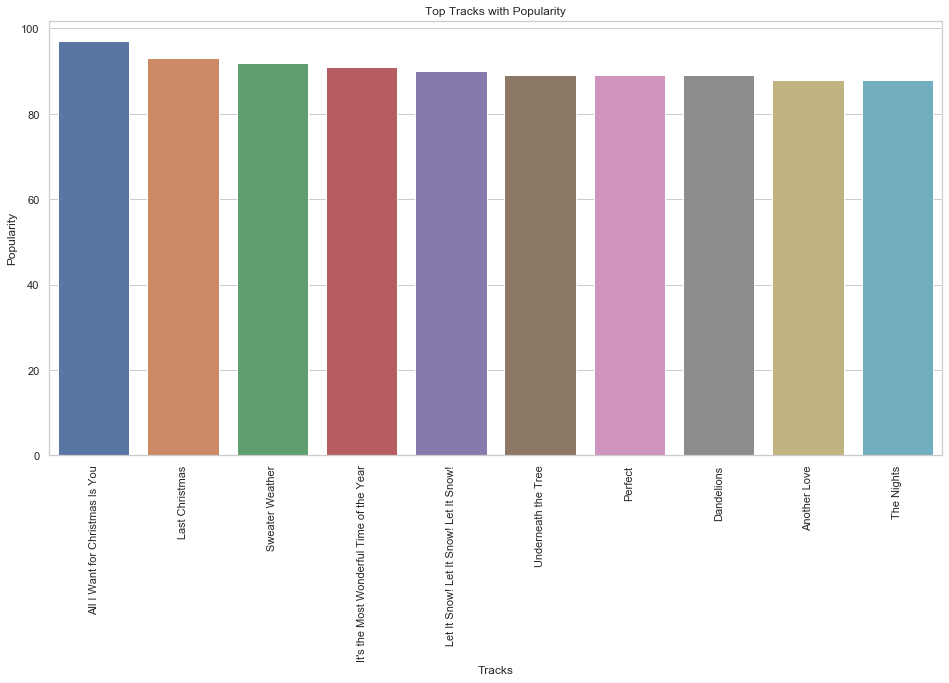

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = sorted_df.groupby("track_name")["track_pop"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation = 90)

<Figure size 1152x576 with 0 Axes>

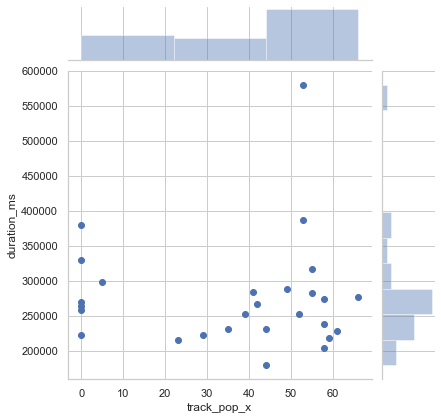

In [36]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=playlistDF_test.track_pop_x,y=playlistDF_test["duration_ms"],data=playlistDF_test)

<Figure size 1152x576 with 0 Axes>

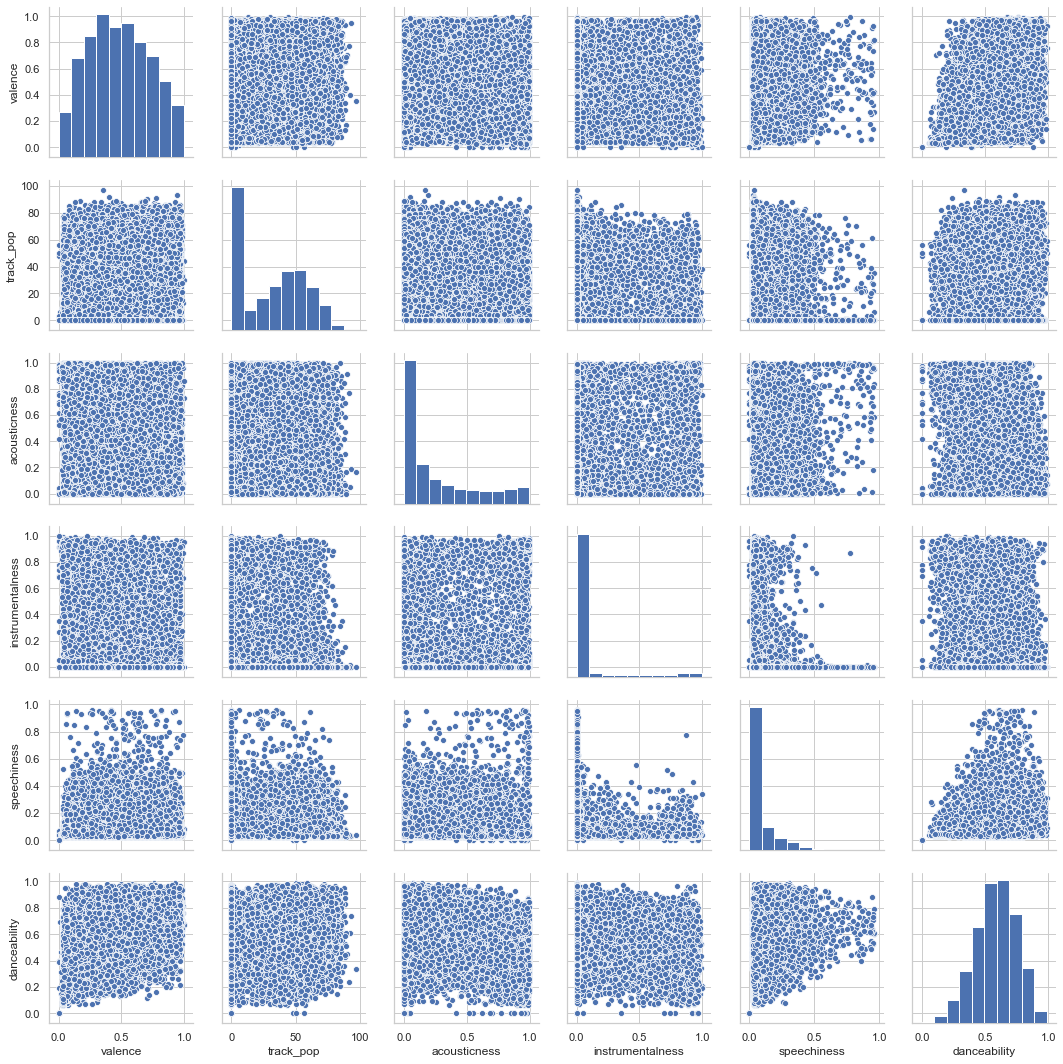

In [37]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","track_pop","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(songDF[cols], height = 2.5 )
plt.show()

In [38]:
df=playlistDF_test.explode('genres')
df
df = df[df.genres != 'unknown']


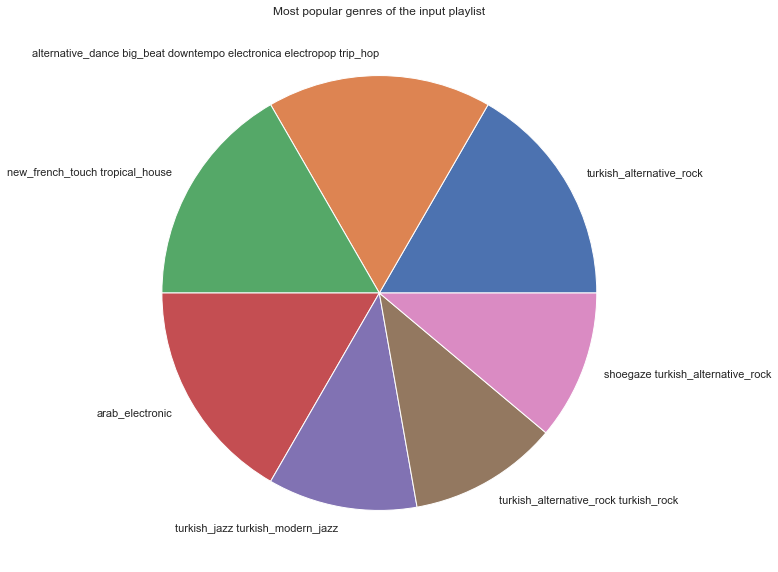

In [39]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.genres.value_counts()[:7].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Most popular genres of the input playlist")
plt.show()

In [45]:
df2=recommend_df.explode('genres')
df2
df2 = df2[recommend_df.genres != 'unknown']

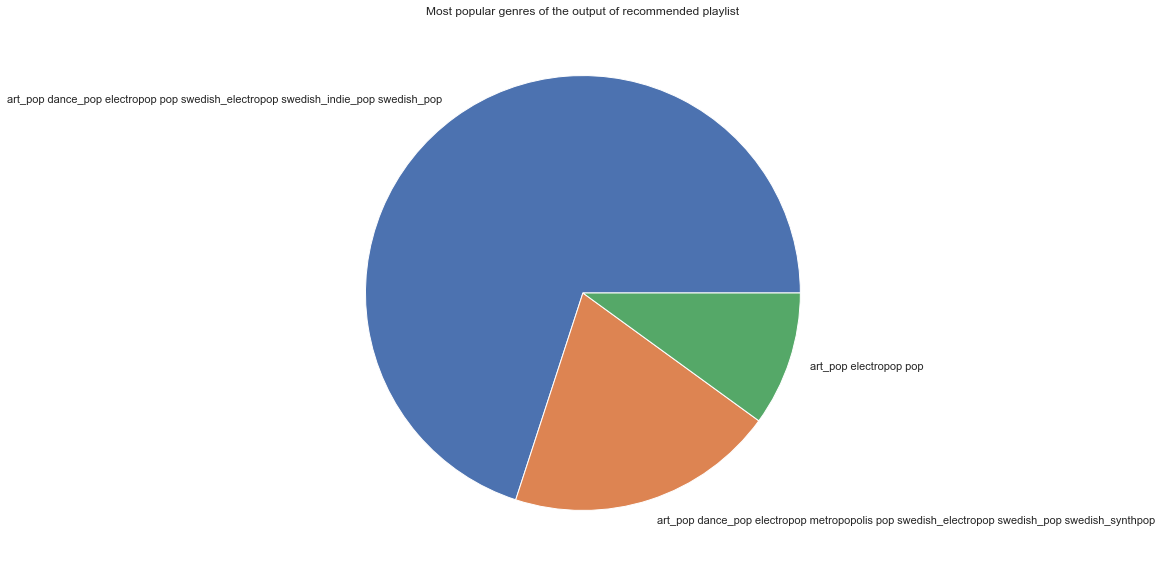

In [46]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df2.genres.value_counts()[:7].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Most popular genres of the output of recommended playlist")
plt.show()